In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [20]:
from google.colab import files

# Mengunggah file dari komputer
uploaded = files.upload()
import pandas as pd
Salary = pd.read_csv('Salary.csv')

Saving Salary.csv to Salary (1).csv


In [21]:
# Menghapus kolom "Unnamed: 0" dari DataFrame "Salary"
Salary = Salary.drop("Unnamed: 0", axis=1)

# Menampilkan lima baris pertama dari DataFrame yang telah diubah
Salary.head()


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [22]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [23]:
Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


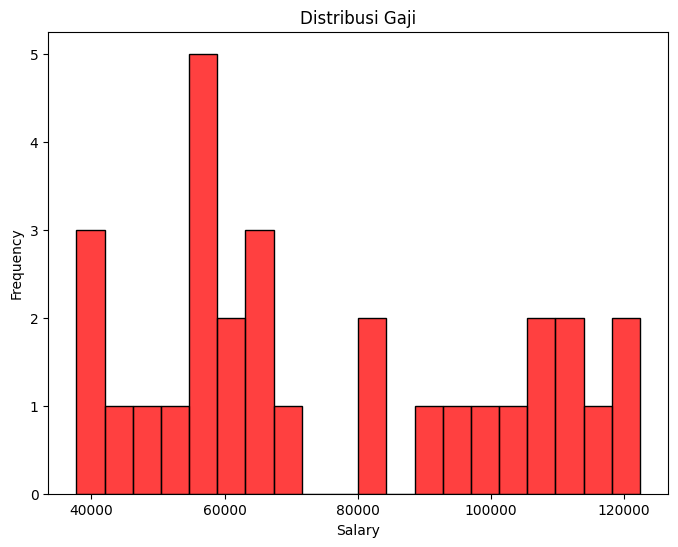

In [24]:
# Mengatur ukuran gambar plot
plt.figure(figsize=(8, 6))

# Membuat histogram distribusi gaji dengan 20 bins dan warna merah
sns.histplot(Salary["Salary"], bins=20, color="red")

# Menambahkan judul plot
plt.title("Distribusi Gaji")

# Menambahkan label sumbu x dan y
plt.xlabel("Salary")
plt.ylabel("Frequency")

# Menampilkan plot
plt.show()


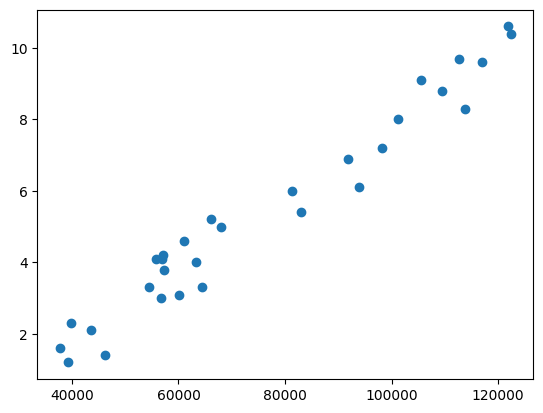

In [25]:
plt.scatter(Salary["Salary"],Salary["YearsExperience"])

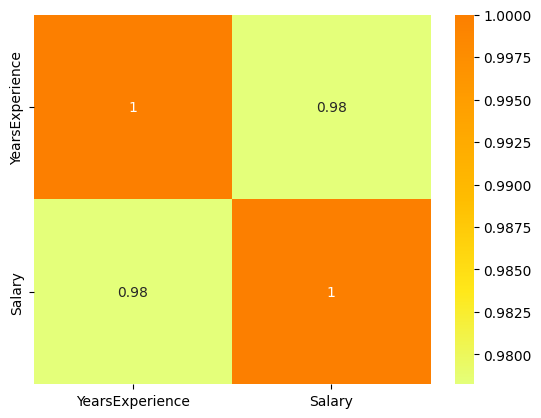

In [26]:
# Menghitung matriks korelasi antar kolom dalam DataFrame 'df'
corr = Salary.corr()
# Membuat heatmap korelasi dengan Seaborn
sns.heatmap(corr, annot=True, cmap='Wistia')
# Menampilkan heatmap korelasi
plt.show()


In [27]:
# Menyiapkan variabel fitur (independent variable) dan target (dependent variable)
x = Salary[["YearsExperience"]]  # Variabel fitur
y = Salary[["Salary"]]           # Variabel target
# Membuat objek model regresi linear
reg = LinearRegression()
# Melatih model regresi linear dengan data
reg.fit(x, y)

LinearRegression()

In [28]:
# Melakukan prediksi menggunakan model regresi
y_pred = reg.predict(x)
# Menghitung skor (R-squared) dari model regresi
score = reg.score(x, y)
# Print hasil prediksi dan skor
print("Hasil Prediksi (y_pred):", y_pred)
print("Skor (R-squared):", score)


Hasil Prediksi (y_pred): [[ 36188.15875227]
 [ 38078.15121656]
 [ 39968.14368085]
 [ 44693.12484158]
 [ 46583.11730587]
 [ 53198.09093089]
 [ 54143.08716303]
 [ 56033.07962732]
 [ 56033.07962732]
 [ 60758.06078805]
 [ 62648.05325234]
 [ 63593.04948449]
 [ 63593.04948449]
 [ 64538.04571663]
 [ 68318.03064522]
 [ 72098.0155738 ]
 [ 73988.00803809]
 [ 75878.00050238]
 [ 81547.97789525]
 [ 82492.9741274 ]
 [ 90052.94398456]
 [ 92887.932681  ]
 [100447.90253816]
 [103282.8912346 ]
 [108007.87239533]
 [110842.86109176]
 [115567.84225249]
 [116512.83848464]
 [123127.81210966]
 [125017.80457395]]
Skor (R-squared): 0.9569566641435086


In [29]:
print(reg.coef_)
print(reg.intercept_)

[[9449.96232146]]
[24848.20396652]


In [30]:
# Melakukan analisis regresi
model = sm.OLS(y, sm.add_constant(x))  # Membuat model regresi linear
result = model.fit()  # Melakukan fitting model ke data
b, m = result.params  # Mendapatkan parameter koefisien (intercept dan slope) dari model

# Menampilkan ringkasan hasil analisis regresi
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        09:19:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

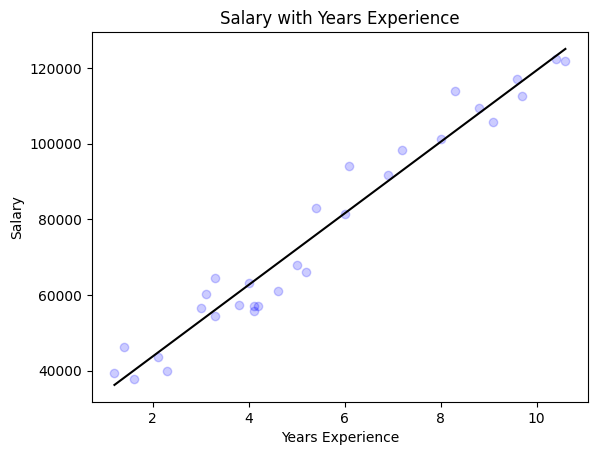

In [31]:
plt.scatter(x,y,alpha=0.2,color="blue")
plt.plot(x,y_pred,color="black")
plt.title("Salary with Years Experience")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()